In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv(r'D:\competition\titanic\train.csv')
test_df = pd.read_csv(r'D:\competition\titanic\test.csv')
combine = [train_df, test_df]
print(train_df.columns.values)
#对应的列的价值
train_df.info()
test_df.info()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count

In [3]:
'''
哪些特征可以进行被分类:Survived,Sex,Embarked
哪些特征为数值类型的:Age,Fare,Discrete:SibSp,Parch
Numerical(数值),alphanumeric(字母) data within same
featurn.数值型、字母型的数据有相同的特征。
比如TIcket为字母型和数值类型的数据类型。Cabin是一个
字母类型数值。
PassengerId=>乘客ID
Pclass=>客舱等级(1/2/3等舱位)
Name=>乘客姓名
Sex=>性别
Age=>年龄
SibSp=>兄弟姐妹数/配偶数
Parch=>父母数/子女数
Ticket=>船票号
Fare=>船票价格
Cabin=>客舱号
Embarked=>登船港口
'''
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
'''
特征为blank,null或者空白的值
Cabin>Age>Embarked 特征有null的对应值
Cabin>Age两者并不匹配
数值特征的分布(distribution of numerical teature)
对应的参数见上面:
数据分布的特征
1.总人数为891人
2.Survived是一个0或1的分类特征
3.大概有38%的样例能够得以生存
(看Survived对应的mean的参数)
(代表实际生存率的32%???)
4.(看Parch一行)大多数乘客(大于75%)
没有与父母或者孩子同行，因为Parch
中超过75%的值为0.0000
(看SibSp一行)50%时的对应值为0.0000
75%时的对应值为1.0000
SibSp:堂兄弟/兄妹个数
Parch:父母与小孩的个数
5.接近30%的乘客在海外有配偶或者子女
6.船费的差距非常大，只有很少的乘客花费512美元
7.很少有老年乘客的年龄在65-80之间
(看Age在75%-max之间)
'''

'\n特征为blank,null或者空白的值\nCabin>Age>Embarked 特征有null的对应值\nCabin>Age两者并不匹配\n数值特征的分布(distribution of numerical teature)\n对应的参数见上面:\n数据分布的特征\n1.总人数为891人\n2.Survived是一个0或1的分类特征\n3.大概有38%的样例能够得以生存\n(看Survived对应的mean的参数)\n(代表实际生存率的32%???)\n4.(看Parch一行)大多数乘客(大于75%)\n没有与父母或者孩子同行，因为Parch\n中超过75%的值为0.0000\n(看SibSp一行)50%时的对应值为0.0000\n75%时的对应值为1.0000\nSibSp:堂兄弟/兄妹个数\nParch:父母与小孩的个数\n5.接近30%的乘客在海外有配偶或者子女\n6.船费的差距非常大，只有很少的乘客花费512美元\n7.很少有老年乘客的年龄在65-80之间\n(看Age在75%-max之间)\n'

In [5]:
train_df.describe()
#这里面describe()里面有些重要的参数缺失
#因为python中如果字段稍微多一些,则会将一些列自动省略掉

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.tail()
train_df.info()
print('_'*40)
#中间有40个对应的'_'
test_df.info()
#!!!从这个表格能够直观地看出来每一项的属性
#以及每一项的对应的数值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:

#接下来需要提出猜想：哪些假设会对数据分析造成影响
#哪些假设会与Survival这一特征相关
#1.完整数据，将对应的年龄特征以及Embarked的特征(与
#生存有关的)完善出来


In [8]:
train_df.describe(include='O')
#注意这里的include里面的字母为'O'
#默认只输出数值型数据的统计信息(如上),
#设置参数为'all'则输入的所有列都在输出中,
#设置为O则只输出离散型变量的统计信息
#Ticket特征之中大概有22%的重复数值

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strom, Miss. Telma Matilda",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
#!!!分析这些数值对于survival这个属性值是否会有影响!!!
#这里为分析的重点!!!
#Ticket可能需要从分析中剔除，因为Ticket数值有很大的重复
#性，可能Ticket与survival之间没有必然的联系
#Cabin特征需要剔除掉，因为Cabin当中的空值出现的比较多
#PassengerId需要从训练集中剔除出来，因为可能与survival
#之间没有必然的联系
#Name特征不是特别标准，可能不能直接与survival有关，所以
#需要被去除掉
#1.创建一个名为Family的新特征基于Parch和SibSp的特征
#2.创建一个姓名的特征，抽取标题作为一个新特征
#3.创建一个年龄段的新特征
#4.创建一个船费范围的特征帮助我们分析

#!!!加入我们的一些假设
#1.Women更容易生存
#2.Children更有可能生存下来
#3.上等社会人物(Pclass=1)更有可能生存下来
#!!!关键属性:Pclass=1,Sex=1,SibSp and Parch
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#上面处理的分布按照Pclass,Sex,SibSp,Parch来进行生存率高低的排序

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


d:\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

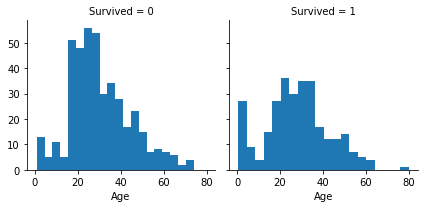

In [13]:
#继续计算相应的直方图与年龄之间的关系
g = sns.FacetGrid(train_df,col='Survived')
#FacetGrid绘制多个图表，纵坐标col的值为'Survived'
g.map(plt.hist,'Age',bins = 20)
#bins=20代表绘制20个对应的图像,'Age'为属性
#plt.hist代表绘制直方图

#从中分析年龄对于生存率的影响
#1.婴儿(年龄小于等于四岁)有较高的生还率
#2.最老的乘客(年龄为80岁)生存了下来
#3.大量数量的15~25岁的学生并没有生存
#4.大多数的乘客在15~35岁的年龄区间
print(train_df.info())
print(test_df.info())
#这里的时候train_df的对应类型为<class 'pandas.core.series.Series'>
#test_df的对应类型为<class 'pandas.core.series.Series'>

d:\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


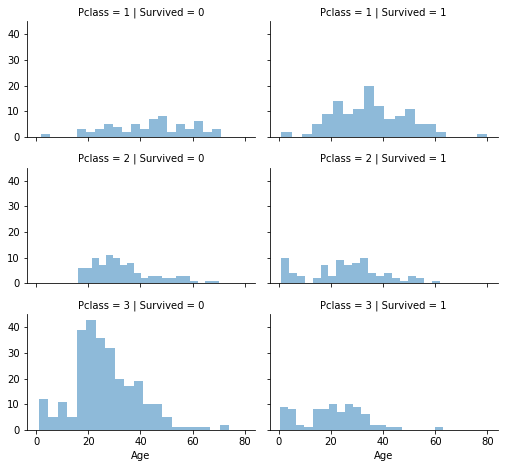

In [14]:
#添加入二元变量进行观察
grid = sns.FacetGrid(train_df, col = 'Survived',row = 'Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha = .5,bins = 20)
grid.add_legend()
#画出来的对应的图片横坐标为年龄，纵坐标为数量
#1.Pclass=3有最多的乘客，但是最多的乘客并没有生还。
#证实了我们之前的归纳猜想假设2
#2.在Pclass=2和Pclass=3的乘客大多数生还了，进一步
#证实了我们之前的归纳猜想假设2
#3.大多数在Pclass=1的乘客生还了，证实了我们之前的
#归纳猜想假设3
#4.对于年龄分布不同的乘客Pclass的对应值不同

d:\python37\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\python37\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


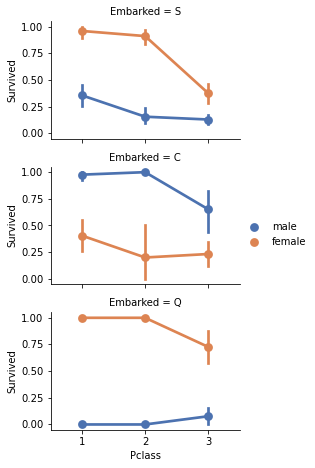

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
#1.女性乘客比男性乘客的生还率高，证明了分类1
#2.Embarked=C的类别比较特殊，男性有较高的生存率
#这可能是Pclass和Embarked的关系反过来作用于Pclass
#和Survived，并不是Embarked和Survived的重要的直接联系
#3.与Pclass=2对于C和Q港口相比，男性在Pclass=3有较好的
#生存率
#4.男性在Pclass=3与Pclass=2有更好的生存率，相比于Pclass
#=2对于C和Q港口，
#5.上岸港口导致在男性乘客中，Pclass=3的生存率不同

#决策：1.将性别特征加入模型训练
#2.完成并向模型训练加入Embarked的特征

d:\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\python37\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


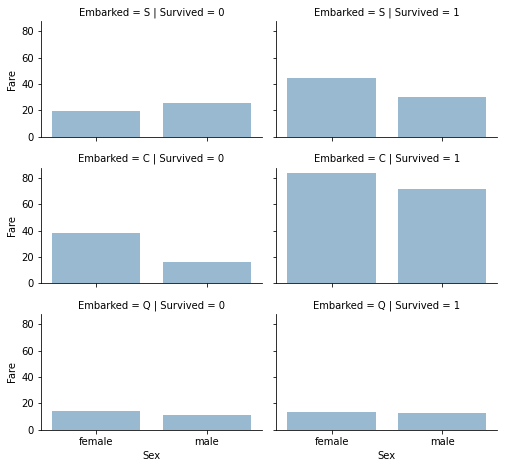

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
#考虑关联分类特征(非数值类型)以及数值特征
#考虑Embarked(分类非数值),Sex(分类非数值),
#Fare(数值),Survived(分类数值)
#!!!观察船舱对于生还率的影响

#更高的费用导致乘客有更高的生还率，验证
#对应的猜想4，登录港口与生存率有关，证明
#了假设1与假设2

In [17]:
#目前我们已经提出了多种假设，但是还没有改变一个单独的特征
#或者价值去达到该假设，现在执行我们的决定和假设去修正、创
#建以及完成目标
#通过去除特征我们将会处理更少的数据集，加速我们的notebook
#并且简化我们相应的分析

#我们在训练和测试集上一起执行操作去保持一致性
#wrangle data应该为数据处理的意思

#下面的操作为去除'Ticket'以及'Cabin'两个属性的操作
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape
#Cabin：客舱号，因为缺失值太多，所以选择放弃Cabin

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [18]:
#分析Name特征是否可以被用来抽取标题与生存的相关性
#正则表达式'\w+\.'匹配第一个单词，结尾有一个小数点
#观察标题、姓名和生存率，可以得出以下的观察结论
#当我们绘制Title,Age和Survived时候，我们注意到一下
#的观察事项：
#1.大多数头衔带年龄群较为准确，例如研究生头衔
#平均年龄为五岁
#2.年龄头衔段变化轻微
#3.一些头衔生存率较高(Mme,Lady,Sir)而不是(Don,Rev,Jonkheer)
#我们决定保存新Title的特征为了模型的训练
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#将内容转化为对应的'Title'以及'Survived'的对应的概率

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#!!!这一步很关键，将对应的姓名打上相应的标签,这是nlp的常规手段
#将相应的文本打上对应的标签
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()
#将姓名的特征打上相应的标注，然后原本这一数据集的对应的内容

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
#现在我们可以安全地将Name特征的参数从训练集和测试集中分离
#同样在训练数据集中我们不需要PassengerId特征
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
#axis=1代表删除对应的列，这里训练集删除'Name'以及'PassengerId'
#所在的列，测试集删除'Name'对应的所在列，如果axis=0代表按行计算
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()
#将Sex的对应的字符串进行相应的更换
#!!!文本处理的一大特征就是需要将相应的字符串转换为对应的数值

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


d:\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


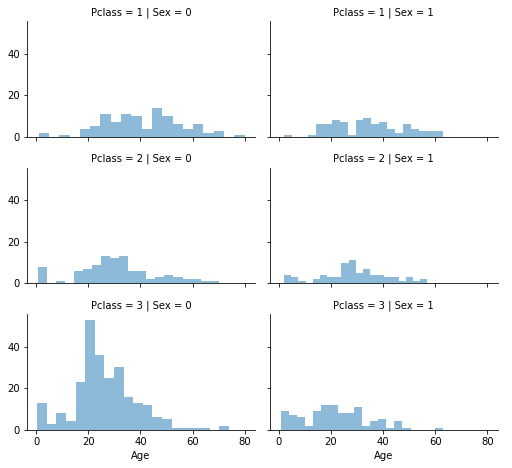

In [23]:
#方法1.在平均和标准误差之中产生随机的数字
#方法2.更准确的猜测缺失值的方式是去使用
#其他相关的特征，比如Age,Gender,Pclass.
#猜想Age的值对于不同种类和性别的人使用
#中位值
#方法3.不再使用基于中位数猜测年龄，而是
#在均值和中间误差之间产生随机数，基于
#Pclass和Gender的混合
#!!!我的理解是一个是从单纯的误差之中去
#选取中位数，而另外一个是结合不同种类
#的人的特征之后再进行选取中位数
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
#python对应的size，aspect的值
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
#对应参数在如下网站https://www.jb51.net/article/191933.htm

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            # 这里的dropna函数的含义代表删除缺失的对象
            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
        #计算对应的'Sex'以及'Pclass'中的平均值以及中位值
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
        #如果'Sex'和'Age'的对应值缺失的时候，将对应的值放入
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
#创建年龄段，判断与生存的关系

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    #后面一个'Age'是对应的属性标记'Age',即改变的是哪个属性的值
    #!!!对太过于松散的数据，比如年龄段进行分段，这一操作也很巧妙
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [29]:
#创建一个新的特征值FamilySize用来记录'SibSp'以及'Parch'的属性和
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#显示平均值关于Survived的逆序关系

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
#IsAlone是否为独自的一人，判断与生存率的关系
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    int32  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Title       891 non-null    int64  
 9   FamilySize  891 non-null    int64  
 10  IsAlone     891 non-null    int64  
dtypes: float64(1), int32(2), int64(7), object(1)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex        

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()
#删除无关的行列对应值
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    o

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
#dropna()删除缺失值，mode()获取沿选定轴的每个元素
#的mode(s),一组值的mode是最常出现的值，它可以是多个值
freq_port
#Embarked特征有S,Q,C的价值，我们选择发生最常见的
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int32  
 3   Age        891 non-null    int32  
 4   Fare       891 non-null    float64
 5   Embarked   889 non-null    object 
 6   Title      891 non-null    int64  
 7   IsAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         417 non-n

In [34]:
print('freq_port = ***')
print(freq_port)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

freq_port = ***
S


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    #使用这个map字典，并且对应完字典中的值之后转为int类型的数值
train_df.head()
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int32  
 3   Age        891 non-null    int32  
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    int32  
 6   Title      891 non-null    int64  
 7   IsAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 52.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         417 non-null    float

In [36]:
#获取车费当中出现最多的值放到车费(Fare)的缺失值之中
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),
                      inplace=True)
#test_df['Fare'].median没打括号，导致这里面内层放置成为
#object()对象，相当于里面没调用这个函数，放置的只是这个
#函数的对象
test_df.head()
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int32  
 3   Age        891 non-null    int32  
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    int32  
 6   Title      891 non-null    int64  
 7   IsAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 52.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         418 non-null    float

In [37]:
#!!!车费这里面的点过于的离散，所以也需要化为具体的数字
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
train_df.info()
test_df.info()
for dataset in combine:
    print('type = ***')
    print(dataset['Fare'])
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    int32   
 3   Age        891 non-null    int32   
 4   Fare       891 non-null    float64 
 5   Embarked   891 non-null    int32   
 6   Title      891 non-null    int64   
 7   IsAlone    891 non-null    int64   
 8   Age*Class  891 non-null    int64   
 9   FareBand   891 non-null    category
dtypes: category(1), float64(1), int32(3), int64(5)
memory usage: 53.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age       

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [39]:
#现在需要训练和预测需要的解决方案
#总共有60多个预测模型算法，我们需要理解问题的类型和解题
#所需要的方法将需求缩小到我们可以预测的少数几个模型
#我们的问题是一个分类和回归问题，需要鉴别输出(是否Survived)
#与变量之间的关系(Gender,Age,Port...)，我们需要使用监督学习
#当我们通过一个给定的数据集来训练我们的模型。
#具体的模型包括：回归模型，KNN或者k-邻近邻居
#支持向量机模型，朴素贝叶斯分类器，决策树，
#随机森林，感知机模型，人工智能网络模型，RVM模型
X_train = train_df.drop("Survived",axis = 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape
#X_train,Y_train使用的都是上面进行处理过的数据，便于进行
#后续的处理

((891, 8), (891,), (418, 8))

In [40]:
#逻辑斯蒂回归中，假设函数h=g(z)用于计算属于某
#样本的可能性，if P(y=1|x)>0.5用于计算给出样本
#的边界，决策边界为一个方程，用于标识出分类函数
#的分类边界，逻辑回归中最常用的代价函数是交叉熵
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#2表示小数点的位数，
acc_log
#使用回归模型先跑下X_train以及Y_train对应的数据，得出
#相应的准确率，每次使用交叉熵进行梯度下降算法

81.37

In [41]:
#计算决策函数中特征的系数，正系数提升反应的log几率，
#负系数减少log的反应几率
#1.Sex为相应的正系数，对应的参数为(male:0,female:1),
#因为female=1时生存率较高，所以生存率为正相关
#2.Pclass参数相反，Survived=1时Pclass参数对应的
#可能性减少的最少(Pclass=3死亡人最多，Pclass=1
#死亡人最少)
#3.Age*Class为一个好的人工模型特征因为它与Survived
#有第二稿的负联系
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


In [42]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc
#支持向量机的目的在于求得最优的即几何间隔最大的超平面，
#在样本数据是线性可分的时候，这里的间隔最大化又叫硬间隔最大化
#（训练数据近似可分的话就叫软间隔）

82.83

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn
#knn：选择k个最近的邻居，相当于当预测一个新值的时候
#根据它距离最近的k个点来判断x属于哪个类别
#k的选择采用交叉验证的方式，距离的计算采用欧式距离

#特点：简单易用，模型训练时间快

84.06

In [44]:
# Gaussian Naive Bayes
#贝叶斯模型公式:P(A|B)=(P(B|A)P(A))//P(B)
#通俗地讲分类算法就是把大量已知特征及类别
#的样本对象输入计算机，让计算机根据这些已
#知的类别与特征归纳出类别与特征之间的规律
#（准确地说应该是分类模型），最终目的是运
#用得到的分类模型对新输入的对象（该对象已
#知特征，类别是不知道的）判断出该对象所属分类。   
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

In [45]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron
#感知机模型

79.35

In [46]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

d:\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.46

In [47]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.54

In [48]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [49]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,82.83
2,Logistic Regression,81.37
7,Linear SVC,79.46
5,Perceptron,79.35
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,76.54
